In [1]:
import pandas as pd 
import numpy as np

In [2]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan, strategy="mean")
si.fit(data.iloc[:, 9:10])
data.iloc[:, 9:10] = si.transform(data.iloc[:, 9:10])

In [5]:
cat_data = []
data_li = list(data.columns)
for i in data_li:
    if data[i].dtype == "object":
        cat_data.append(i)
cat_data

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [6]:
X= data.iloc[:, 1:-1]
y = data.iloc[:, -1]

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[("ecoder", OneHotEncoder(), [0, 4, 5, 6, 9])], remainder="passthrough")
X = np.array(ct.fit_transform(X))

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs",max_iter=10000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

c:\Users\yash0\Desktop\Python\Machine Learning\Projects\Medical\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='stroke', ylabel='Density'>

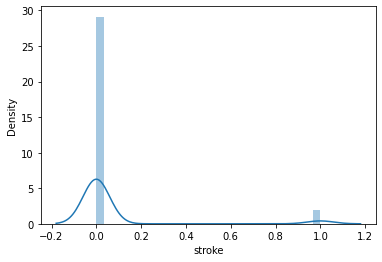

In [10]:
import seaborn as sns
sns.distplot(y_test-y_pred)

In [11]:
a1= cross_val_score(estimator=lr, X=X_train, y=y_train, cv =10)
print(a1.mean())

0.9542571551848121
